# Urban canyon simulation plots
This example includes the scripts for the genertion of plots relative to the street canyon simulations.

It begins with the plotting of ETCs resulting from different simulation/scattering implementations.

The second section includes plots relative to the computational performance of the simulation.

In [18]:
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import pyfar as pf
from utils.fig_formatting import create_fig, export_fig
import csv
%matplotlib inline

Select data origin (same as paper or user-generated)

In [19]:
###################################################
#### SET "True" TO LOAD YOUR OWN GENERATED DATA
#### "False" TO LOAD THE DATA FROM THE PAPER
self_data=False
###################################################

if self_data:
    sub_dir="user"
else:
    sub_dir="paper"

basepath = os.path.join(os.getcwd(),"resources",sub_dir)

## ETC comparison in the street canyon

Load sparrowpy ETC data

In [20]:
# change the name of the file to load results with different patch sizes
sparrow_ETCs = pf.io.read(os.path.join(basepath,"ETCs_psize3.far"))

# sparrowpy ETCs
BSC_based=sparrow_ETCs["custom_etc"][0]
RISC_based = sparrow_ETCs["diffuse_etc"][0]
freq=sparrow_ETCs["freqs"]

Load RAVEN (ray-tracing) ETC data

In [21]:
# load raw data form RAVEN's output file
f=[]
ffile = os.path.join(basepath,"raven_streetcanyon_retro.csv")
with open(ffile, mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        f.append(lines)

  g = np.array(f,dtype=np.float64)

# discern and normalize data
ffreq=g[0]
ttime = g[1:,0]
data = g[1:,1:].T/(4*np.pi)

# organise ETCs into pyfar TimeData object
ddata=np.empty((freq.shape[0],data.shape[-1]))
for i,f in enumerate(freq):
    ddata[i] = data[np.where(ffreq==f)[0]]
raven = pf.TimeData(data=ddata,times=ttime)

### nice big plot

Select frequency band to plot

In [26]:
# change this variable to check different frequency bands
freq_bin = 4e3
##

i = np.argmin(np.abs(freq-freq_bin))

C:\Users\jotag\AppData\Local\Temp\ipykernel_11252\601570911.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_xticklabels([""])
C:\Users\jotag\AppData\Local\Temp\ipykernel_11252\601570911.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axin.set_yticklabels([""])


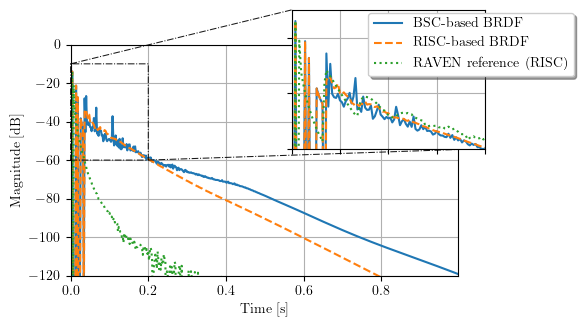

In [27]:
f,a=create_fig(figtype="big")
# main plot
pf.plot.time(BSC_based[i], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-")
pf.plot.time(RISC_based[i], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--")
pf.plot.time(raven[i], dB=True, log_prefix=10,
             label=["RAVEN reference (RISC)"],
             linestyle=":")
plt.legend(fontsize=10,loc="center left",bbox_to_anchor=(.75, 1 ),shadow=True)
plt.xlabel("Time  [s]")
plt.ylabel("Magnitude [dB]")
plt.ylim([-120,0])


# zoomed section
axin = a.inset_axes([0.57, 0.55, 0.5, 0.6])
axin.grid()
pf.plot.time(BSC_based[-2], dB=True, log_prefix=10,
             label=["BSC-based BRDF"],
             linestyle="-",ax=axin)
pf.plot.time(RISC_based[-2], dB=True, log_prefix=10,
             label=["RISC-based BRDF"],
             linestyle="--",ax=axin)
pf.plot.time(raven[-2], dB=True, log_prefix=10,
             label=["RAVEN reference (RISC)"],
             linestyle=":",ax=axin)
axin.set_xlim(0,.2)
axin.set_ylim(-60,-10)
axin.set_xlabel("")
axin.set_ylabel("")
axin.set_xticklabels([""])
axin.set_yticklabels([""])
a.indicate_inset_zoom(axin,edgecolor='k',linestyle='-.',alpha=.9,linewidth=.75)

export_fig(f,filename="Figure12")

helpful labels

In [28]:
tlabel="run-time\,[s]"
mlabel="peak memory\,[MB]"
mlegend=["baking", "exchange","collection","baseline"]
tlegend=["baking", "exchange","collection","total", "baseline"]

In [29]:
# get file from
with open(os.path.join(basepath,"urban_canyon_with_mem_.json")) as json_file:
    dat = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\jotag\\Documents\\dev\\sparapy\\supp_materials\\resources\\paper\\urban_canyon_with_mem_.json'

## time step

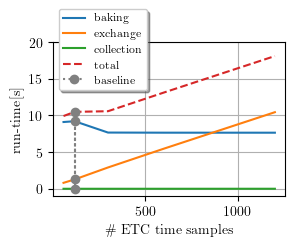

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


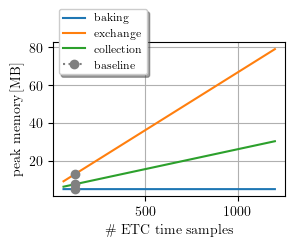

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
t = np.array(dat["time_step"]["t"])[:,1:]
d = np.array(dat["time_step"]["data"])
m = np.array(dat["time_step"]["mem"])[:,1:,1]/1000**2
n = 1.2/d

i = np.argwhere(n==120)[0]

ssum = np.sum(t,axis=1)

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,ssum,'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.25),shadow=True)
plt.ylim([-1,20])
plt.show()

export_fig(fn,filename="Figure13a")

# fm,a=create_fig()
# plt.plot(d*1000,m)
# plt.xlabel("$$\\Delta t \\quad [\\mathrm{ms}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# ETC time samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.25),shadow=True)
plt.show()

export_fig(fmn,filename="Figure13b")

## BRDF resolution

C:\Users\jotag\AppData\Local\Temp\ipykernel_31208\3526125650.py:6: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.gaussian.'
  samples = pf.samplings.sph_gaussian(dd)
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\samplings\samplings.py:344: PyfarDeprecationWarning: 'This function will be changed in pyfar 0.8.0 to init(x, y, z).'
  sampling = pyfar.Coordinates(
c:\Users\jotag\Documents\dev\sparapy\.venv\Lib\site-packages\pyfar\classes\coordinates.py:276: PyfarDeprecationWarning: 'This function will be deprecated in pyfar 0.8.0 in favor of spharpy.samplings.SamplingSphere.'
  self.sh_order = sh_order


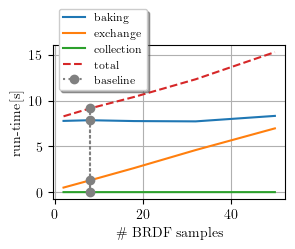

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


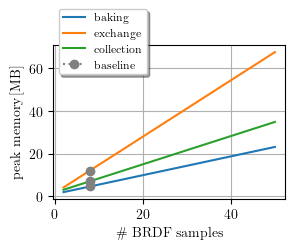

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
t = np.array(dat["brdf_resolution"]["t"])[:,1:]
d = np.array(dat["brdf_resolution"]["data"])
m = np.array(dat["brdf_resolution"]["mem"])[:,1:,1]/1024**2
n=[]
for dd in d:
    samples = pf.samplings.sph_gaussian(dd)
    n.append(samples[np.where((samples.elevation*180/np.pi >= 0))].cshape[0])

n=np.array(n)
i = np.argwhere(n==8)[0]
# f,a=create_fig()
# plt.plot(d[1:],t[1:])
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

ssum = np.sum(t,axis=1)

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.27),shadow=True)
plt.show()

export_fig(fn,filename="Figure15a")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta \\psi \\quad [^{\\circ}]$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fmn,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\# BRDF samples")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.27),shadow=True)
plt.show()

export_fig(fmn,filename="Figure15b")


## reflection order

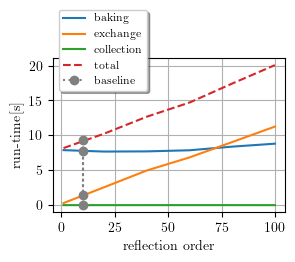

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


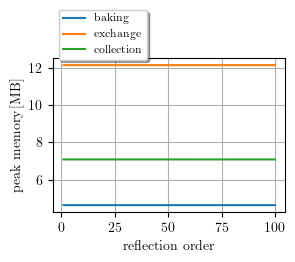

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
t = np.array(dat["reflection_order"]["t"])[:,1:]
d = np.array(dat["reflection_order"]["data"])
m = np.array(dat["reflection_order"]["mem"])[:,1:,1]/1024**2

ssum = np.sum(t,axis=1)

tt = (10*(t.T[:,1]-t.T[:,0])/19 + t.T[:,0])
ssum = (10*(ssum[1]-ssum[0])/19 + ssum[0] )

f,a=create_fig()
plt.plot(d,t)
plt.plot(d,np.sum(t,axis=1),'--')
plt.plot(10*np.ones((len(t.T[:,0])+1)),np.append(tt , ssum),'o:', color='gray')
plt.xlabel("reflection order")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.35),shadow=True)

plt.show()

export_fig(f,filename="Figure14a")

fm,a=create_fig()
plt.plot(d,m)
#plt.plot(d[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("reflection order")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,loc="upper left",bbox_to_anchor=(0, 1.35),shadow=True)
plt.show()

export_fig(fm,filename="Figure14b")

## patch size

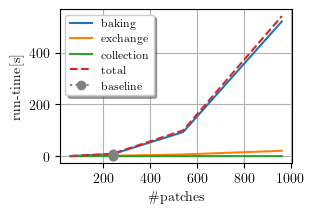

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


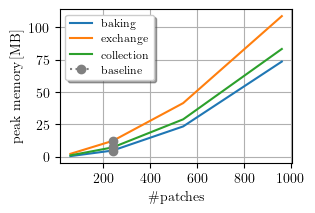

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [ ]:
t = np.array(dat["patch_size"]["t"])[:,1:]
d = np.array(dat["patch_size"]["data"])
m = np.array(dat["patch_size"]["mem"])[:,1:,1]/1024**2
n = (6*2+12)*90/d**2

n=np.array(n)
ssum = np.sum(t,axis=1)
i = np.argwhere(n==240)[0]
# f,a=create_fig()
# plt.semilogx(d,t)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(tlabel)
# plt.legend(tlegend,fontsize=8)
# plt.show()

fn,a=create_fig()
plt.plot(n,t)
plt.plot(n,np.sum(t,axis=1),'--')
plt.plot(n[i]*np.ones((len(t.T[:,i])+1)),np.append(t.T[:,i],ssum[i]),'o:', color='gray')
plt.xlabel("\\#patches")
plt.ylabel(tlabel)
plt.legend(tlegend,fontsize=8,shadow=True)
plt.show()

export_fig(fn,filename="Figure16a")

# fm,a=create_fig()
# plt.plot(d,m)
# plt.xlabel("$$\\Delta S$$")
# plt.ylabel(mlabel)
# plt.legend(mlegend,fontsize=8)
# plt.show()

fm,a=create_fig()
plt.plot(n,m)
plt.plot(n[i]*np.ones_like(m.T[:,i]),m.T[:,i],'o:', color='gray')
plt.xlabel("\\#patches")
plt.ylabel(mlabel)
plt.legend(mlegend,fontsize=8,shadow=True)
plt.show()

export_fig(fm,filename="Figure16b")